In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import data using pandas; converts into a data frame
df = pd.read_csv('data.csv')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [35]:
# Get some main characteristics of the data
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,...,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,2.026465,3.337429,3.082231,2.837429,3.604915,4.146503,3.285444,2.536862,2.579395,2.862949,...,3.935728,2.768431,2.844045,4.011342,3.371078,2.957372,2.764745,29.165406,1.450851,87.500945
std,1.075776,1.110941,1.164699,1.159077,1.054277,0.982482,1.098634,1.230741,1.221005,1.202775,...,1.137488,1.307957,1.231588,0.706788,0.660878,0.411734,0.645335,82.373897,0.497814,12.068729
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.300000,0.000000,0.000000,0.000000,14.000000,1.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,2.900000,2.800000,2.300000,18.000000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.400000,3.000000,2.800000,22.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,2670.000000,2.000000,100.000000


In [4]:
correlations = df.corr()['gender'].drop('gender')
# print(correlations)

<AxesSubplot:>

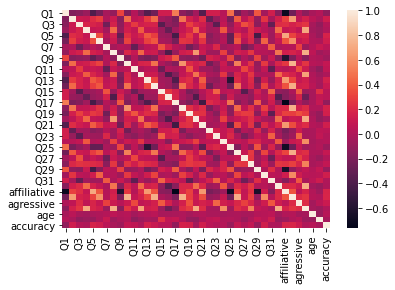

In [5]:
sns.heatmap(df.corr())

In [6]:
def get_features(correlation_threshold):
  abs_corrs = correlations.abs()
  high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
  return high_correlations

In [7]:
features = get_features(0.1)
print(features)

['Q3', 'Q7', 'Q11', 'Q15', 'Q19', 'Q20', 'Q31']


In [8]:
# Remove 0s and 3s from gender (since there isn't enough data for this study)
idx1 = np.array(df.index[df['gender'] == 3])
idx2 = np.array(df.index[df['gender'] == 0])
idx = np.append(idx1, idx2)

df = df.drop(idx)

In [9]:
X = df[features]
y = df['gender']

In [10]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### K-Nearest Neighbours Algorithm

In [11]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [13]:
knn_pred = knn.predict(X_test)

In [14]:
# Evaluate model
a1 = accuracy_score(y_test, knn_pred)
print('Accuracy', a1)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

Accuracy 0.589622641509434
[[82 25]
 [62 43]]
              precision    recall  f1-score   support

           1       0.57      0.77      0.65       107
           2       0.63      0.41      0.50       105

    accuracy                           0.59       212
   macro avg       0.60      0.59      0.58       212
weighted avg       0.60      0.59      0.58       212



In [15]:
err = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

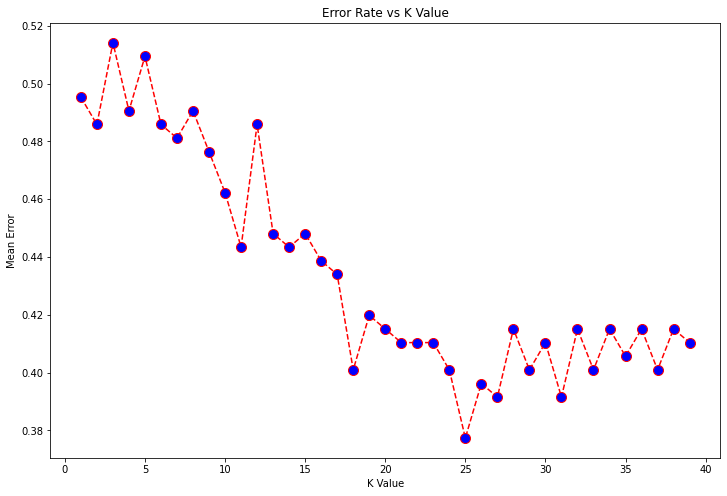

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 40), err, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Support Vector Machine Algorithm

In [17]:
# create svm Classifier
clf = SVC(gamma='scale', C=3) # linear kernel with gamma scale
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

In [18]:
# Model Accuracy
a2 = accuracy_score(y_test, svm_pred)
print('Accuracy:', a2)

Accuracy: 0.5754716981132075


In [19]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", precision_score(y_test, svm_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", recall_score(y_test, svm_pred))

Precision: 0.5594405594405595
Recall: 0.7476635514018691


In [20]:
err = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    clf = SVC(gamma='scale', C=i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

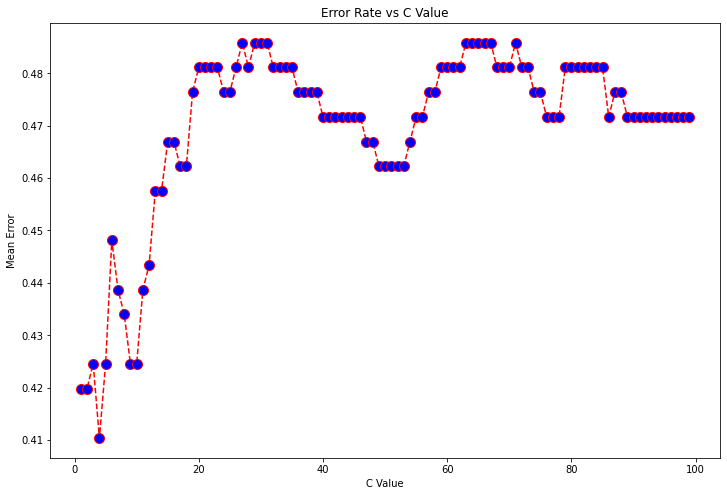

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 100), err, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs C Value')
plt.xlabel('C Value')
plt.ylabel('Mean Error')

### Random Forest Classification

In [22]:
random_forest = RandomForestClassifier(n_estimators = 400, max_features='sqrt') # adjust these hyperparameters
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=400)

In [23]:
rf_pred = random_forest.predict(X_test)
print(rf_pred)

[1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 1 1 2
 2 2 1 1 1 2 2 1 1 2 1 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 1 1 1 2 2 1 1 1 2 1 1
 2 1 1 2 1 1 1 1 2 2 1 2 1 2 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 2 2 2 2 2 1 1 2
 1 1 2 2 1 2 2 1 2 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1
 2 2 1 1 1 2 1 2 2 2 1 1 2 1 1 1 1 2 2 1 2 2 1 1 2 2 1 1 1 2 2 1 2 1 1 2 1
 1 1 2 1 1 2 1 2 2 2 2 2 1 1 2 1 2 1 1 1 1 2 1 1 2 2 1]


In [24]:
# Check the accuracy of the model
a3 = accuracy_score(y_test, rf_pred)
print('Accuracy', a3)
print(classification_report(y_test, rf_pred))

Accuracy 0.5283018867924528
              precision    recall  f1-score   support

           1       0.53      0.64      0.58       107
           2       0.53      0.42      0.47       105

    accuracy                           0.53       212
   macro avg       0.53      0.53      0.52       212
weighted avg       0.53      0.53      0.52       212



In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
# no. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# no. of features used at each split
max_features = ['auto', 'sqrt']

# create random grid 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

In [27]:
# Random search training
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [28]:
# Get the best hyperparameters
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'sqrt'}

### Comparing the models

In [29]:
from sklearn import model_selection

results = []
names = []
models = [('kNN', KNeighborsClassifier()), 
          ('SVM', SVC()), 
          ('RF', RandomForestClassifier())]

In [30]:
seed = 7
scoring = 'accuracy'

In [31]:
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

kNN: 0.565256 (0.048816)
SVM: 0.604942 (0.052317)
RF: 0.565202 (0.046103)


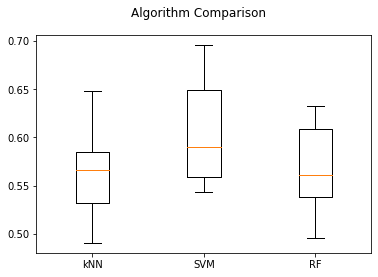

In [32]:
# create boxplots of the models
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()